
# 🚴 AdventureWorks Sales Analysis
* **Author:** Ali Akyel
* **Date:** 2024-10-25
* **Goal:** Analyze sales, customer, and product data to identify key business insights and strategic opportunities.

---

### 📋 Table of Contents
* [1. Product Portfolio (Category Count)](#q1)
* [2. Revenue by Category](#q2)
* [3. Sales Trends over Time](#q3)
* [4. Sales vs. Budget Analysis](#q4)
* [5. Top Customers](#q5)
* [6. Regional Sales & Customers](#q6)
* [7. Average Order Value (Store vs. Individual)](#q7)
* [8. VG Option: Product Profitability Matrix](#q8)

---


## Setup (Code)
Imports
Connection
server = 'localhost'
database = 'AdventureWorks2022'



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text
from urllib.parse import quote_plus


server = '.\\SQLEXPRESS'
database = 'AdventureWorks2025'
driver = quote_plus("ODBC Driver 17 for SQL server")


connection_string = (
    f"mssql+pyodbc://@{server}/{database}"
    f"?driver={driver}&trusted_connection=yes&Encrypt=yes&TrustServerCertificate=yes"
)

engine = create_engine(connection_string)


try:
    with engine.connect():
        print("✅ Connection to SQL Server successful!")
except Exception as e:
    print("❌ Could not connect to the database.", e)

✅ Connection to SQL Server successful!


C:\Users\AliAkyel\AppData\Local\Temp\ipykernel_25128\3500691540.py:21: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  with engine.connect():


### ... connection string & engine

In [2]:
def query_df(sql: str):
    with engine.connect() as conn:
        return pd.read_sql(text(sql), conn)
    

<a id="q1"></a>
## 1. How many products are in each category?


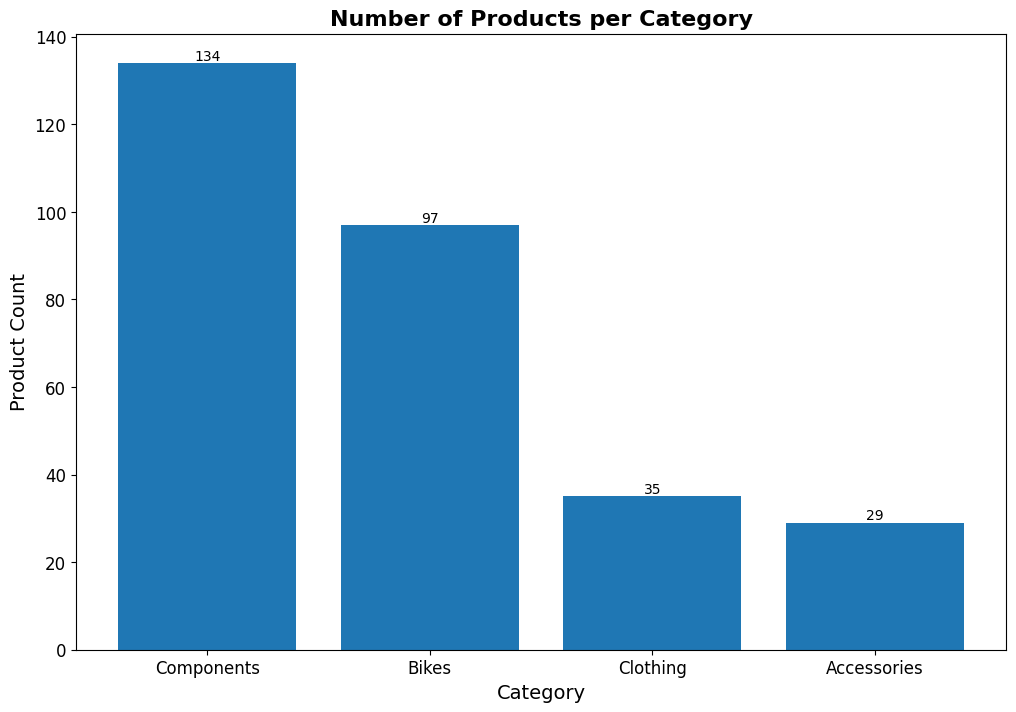

Data Overview:


,CategoryName,ProductCount
0,Components,134
1,Bikes,97
2,Clothing,35
3,Accessories,29


In [3]:
with open('../data/query1.sql', 'r') as file:
    query_q1 = file.read()

df_q1 = pd.read_sql(query_q1, engine)

plt.figure(figsize=(12, 8))
bars = plt.bar(df_q1['CategoryName'], df_q1['ProductCount'], color='#1f77b4')

plt.title('Number of Products per Category', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Product Count', fontsize=14)
plt.bar_label(bars)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print("Data Overview:")
display(df_q1)

### 📊 Analysis: Product Portfolio Structure

**Key Findings:**
* **Components** has the highest number of products, **134**. This indicates that Adventure Works provides a broad range of spare parts for bikes. 
* **Bikes** follow with **97** models, which shows that Adventure Works primarily sells bikes and spare parts for the bikes. 
* **Clothing** (35) and **Accessories** (29) have significantly fewer distinct products, serving as cross-sell opportunities rather than core offerings.


## 2. Revenue by Category

**Business Question:** Which product categories generate the most revenue?


**Goal:** Identify the primary drivers of cash flow for the business.

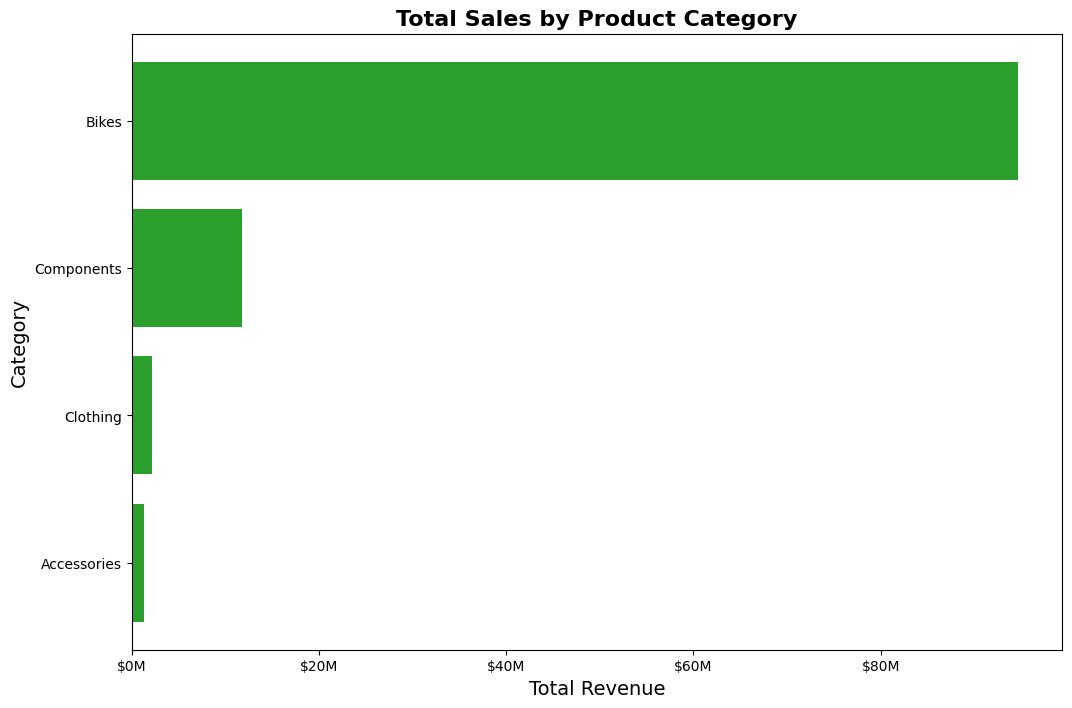

Data Overview:


,CategoryName,TotalSales
0,Bikes,9.465117e+07
1,Components,1.180259e+07
2,Clothing,2.120543e+06
3,Accessories,1.272073e+06


In [4]:
with open('../data/query2.sql', 'r') as file:
    query_q2 = file.read()

df_q2 = pd.read_sql(query_q2, engine)

plt.figure(figsize=(12, 8))

bars = plt.barh(df_q2['CategoryName'], df_q2['TotalSales'], color='#2ca02c')

plt.title('Total Sales by Product Category', fontsize=16, fontweight='bold')
plt.xlabel('Total Revenue', fontsize=14)
plt.ylabel('Category', fontsize=14)

plt.gca().invert_yaxis()


plt.ticklabel_format(style='plain', axis='x')

import matplotlib.ticker as mticker
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '${:,.0f}M'.format(x/1_000_000)))

plt.show()

print("Data Overview:")
display(df_q2)

### 💡 Insights & Analysis

**Key Findings:**
* **The Powerhouse:** **Bikes** are the overwhelming revenue driver, generating over **$94 Million**. This accounts for nearly **97%** of total company sales.
* **The Disconnect:** Comparing this to Question 1, while **Components** had the most *products* (134), they generate very little *revenue*.
* **Strategic Implication:** The company effectively spends its manufacturing effort (high component count) to support the sales of one category (Bikes). The "Pareto Principle" (80/20 rule) is extreme here: one category carries the entire business.

<a id="q3"></a>
## 3. Sales Trends over Time

**Business Question:** How has revenue changed in time?


**Goal:** Identify growth patterns and seasonal peaks to optimize inventory planning.

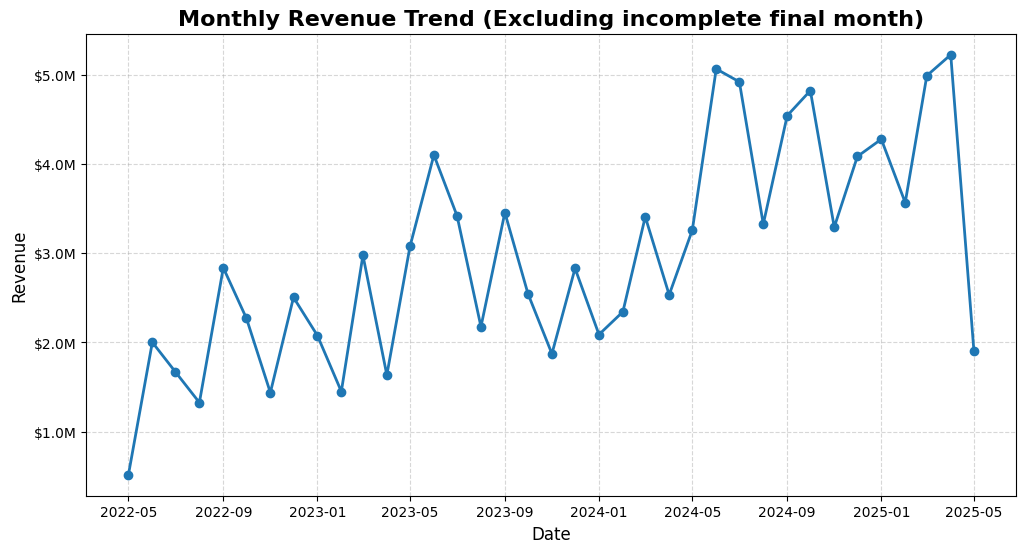

📈 Months with Positive Growth (Upside Trend):


,OrderDate,TotalSales,Growth
1,2022-06-01,"$2,001,279","+$1,483,542"
4,2022-09-01,"$2,836,410","+$1,510,272"
7,2022-12-01,"$2,504,196","+$1,066,854"
10,2023-03-01,"$2,975,748","+$1,525,865"
12,2023-05-01,"$3,074,603","+$1,440,002"
13,2023-06-01,"$4,099,354","+$1,024,752"
16,2023-09-01,"$3,454,152","+$1,278,515"
19,2023-12-01,"$2,829,405","+$956,703"
21,2024-02-01,"$2,343,260","+$255,388"
22,2024-03-01,"$3,407,037","+$1,063,777"


In [20]:
with open('../data/query3.sql', 'r') as file:
    query_q3 = file.read()

df_q3 = pd.read_sql(query_q3, engine)
df_q3['OrderDate'] = pd.to_datetime(df_q3['OrderDate'])

df_q3 = df_q3.iloc[:-1] 

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_q3['OrderDate'], df_q3['TotalSales'], marker='o', linestyle='-', color='#1f77b4', linewidth=2)

ax.set_title('Monthly Revenue Trend (Excluding incomplete final month)', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Revenue', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)

import matplotlib.ticker as mticker
def currency_formatter(x, pos):
    if x >= 1_000_000:
        return '${:,.1f}M'.format(x * 1e-6)
    return '${:,.0f}K'.format(x * 1e-3)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(currency_formatter))

plt.show()

df_q3['Growth'] = df_q3['TotalSales'].diff()

upside_months = df_q3[df_q3['Growth'] > 0].copy()

display_table = upside_months.copy()
display_table['TotalSales'] = display_table['TotalSales'].map('${:,.0f}'.format)
display_table['Growth'] = display_table['Growth'].map('+${:,.0f}'.format) 

print("📈 Months with Positive Growth (Upside Trend):")
display(display_table[['OrderDate', 'TotalSales', 'Growth']])

### 💡 Insights & Analysis:

**1. The "Quarter-End" Phenomenon:**
A clear pattern emerges at the end of financial quarters. There are consistent growth spikes in **March, June, September, and December**. This strongly suggests that sales performance is driven by **quarterly targets and quotas**, where sales teams push to close deals before the period ends.

**2. Seasonal Anchors:**
* **December:** Consistently high performance correlates with the global holiday gift-giving season.
* **Mid-Year (June):** aligns with the start of the summer cycling season in the Northern Hemisphere.

**3. Anomalies & Action Items:**
Spikes in off-season months like **February and October** are irregularities.
* *Hypothesis:* These could be driven by specific marketing campaigns, clearance sales, or new model launches (e.g., announcing next year's bike models in autumn).
* *Recommendation:* Investigate historical marketing calendars to correlate these spikes with specific promotional events.


## Visualization 4: Sales and Number of Orders per Year

What do total sales and number of orders look like per year?

Data Requirements:

- Use tables: Sales.SalesOrderHeader
- Show both total sales AND number of orders
- Group by year
- Sort chronologically

Visualization Requirements:

- Type: Grouped bar chart OR two separate bars per year
- Title: "Sales and Number of Orders per Year"

Insight Requirements:

- Compare the years - which year had the highest sales? Are both sales AND number of orders increasing, or just one?

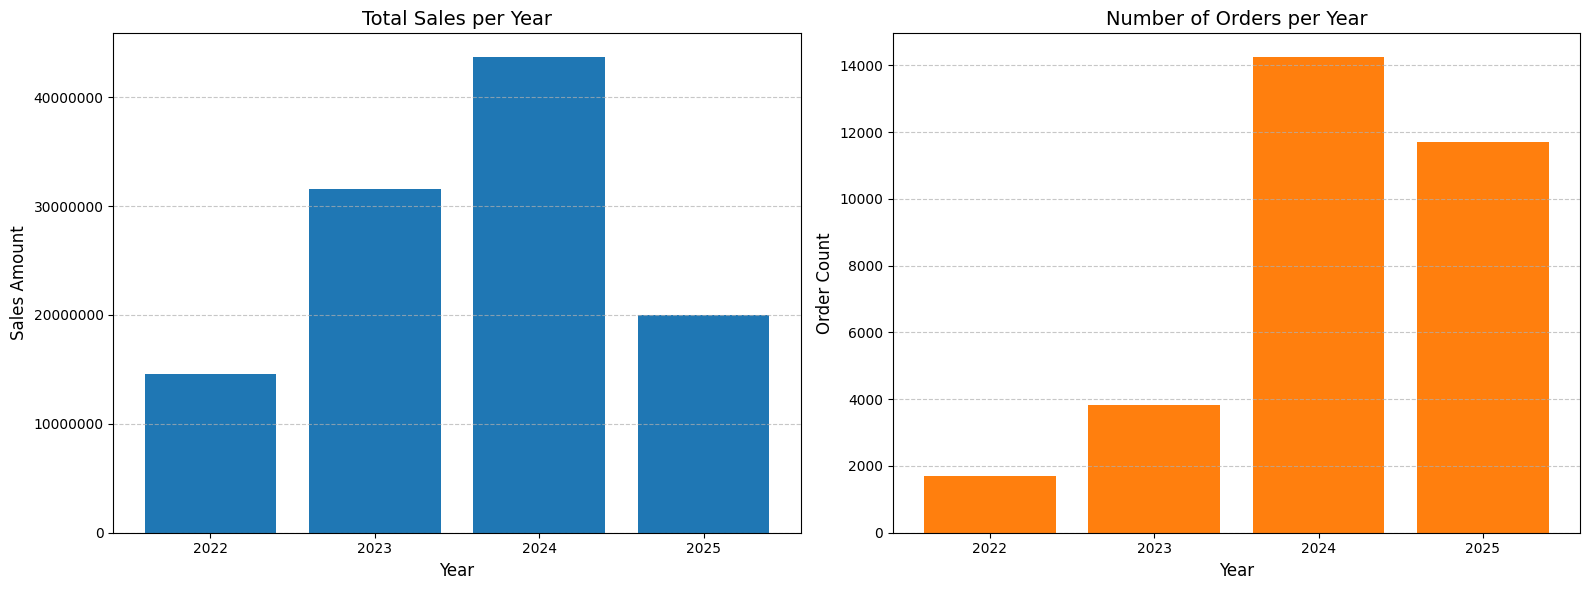

Data Overview:
   OrderYear    TotalSales  TotalOrders
0       2022  1.456105e+07         1692
1       2023  3.160492e+07         3830
2       2024  4.367189e+07        14244
3       2025  2.000852e+07        11699


In [6]:
# --- QUESTION 4: Sales vs. Orders per Year ---

# 1. READ SQL
with open('../data/query4.sql', 'r') as file:
    query_q4 = file.read()

# 2. GET DATA
df_q4 = pd.read_sql(query_q4, engine)

# 3. VISUALIZE (Using Subplots to handle different scales)
# fig is the container, ax1 and ax2 are the two separate charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- Chart 1: Total Sales (The Money) ---
ax1.bar(df_q4['OrderYear'].astype(str), df_q4['TotalSales'], color='#1f77b4')
ax1.set_title('Total Sales per Year', fontsize=14)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Sales Amount', fontsize=12)
ax1.ticklabel_format(style='plain', axis='y') # Remove scientific notation
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# --- Chart 2: Number of Orders (The Volume) ---
ax2.bar(df_q4['OrderYear'].astype(str), df_q4['TotalOrders'], color='#ff7f0e')
ax2.set_title('Number of Orders per Year', fontsize=14)
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Order Count', fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout so title doesn't overlap
plt.tight_layout()
plt.show()

# 4. INSIGHTS
print("Data Overview:")
print(df_q4)

**Add Analysis and Insights on Q4**

## Vis 5: Top 10 Products

Business Question: Which 10 products generate the most sales?

Data Requirements:

- Use tables: Production.Product, Sales.SalesOrderDetail
- Show only TOP 10 products
- Sort from highest to lowest sales

Visualization Requirements:

- Type: Horizontal Bar Chart (barh)
- Title: "Top 10 Products by Sales"
- Sort bars from highest to lowest (highest at the top)

Insight Requirements:

- Name the #1 product with exact sales value. Which category dominates the top 10?

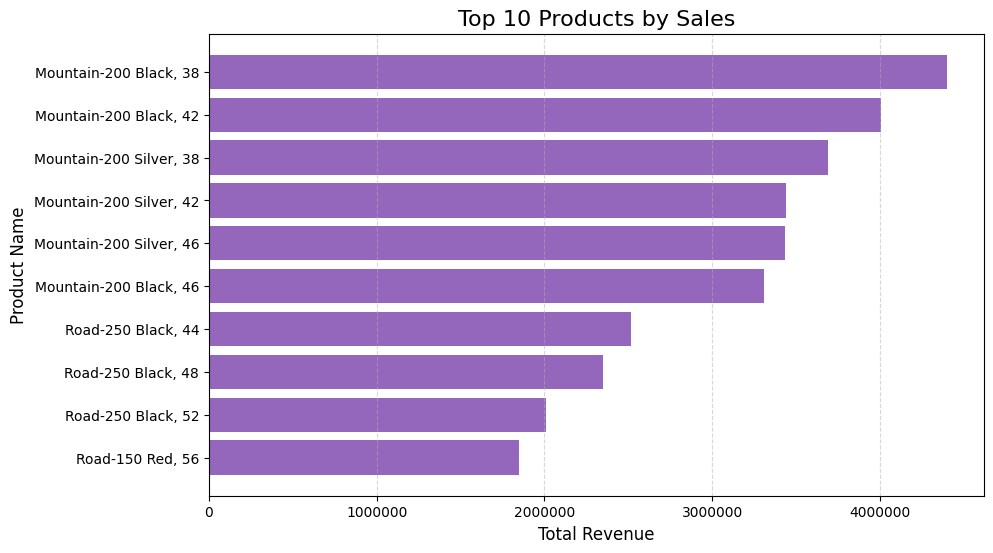

Top 10 List:
               ProductName    TotalSales
0   Mountain-200 Black, 38  4.400593e+06
1   Mountain-200 Black, 42  4.009495e+06
2  Mountain-200 Silver, 38  3.693678e+06
3  Mountain-200 Silver, 42  3.438479e+06
4  Mountain-200 Silver, 46  3.434257e+06
5   Mountain-200 Black, 46  3.309673e+06
6       Road-250 Black, 44  2.516857e+06
7       Road-250 Black, 48  2.347656e+06
8       Road-250 Black, 52  2.012448e+06
9         Road-150 Red, 56  1.847819e+06


In [7]:
# --- QUESTION 5: Top 10 Products by Sales ---

# 1. READ SQL
with open('../data/query5.sql', 'r') as file:
    query_q5 = file.read()

# 2. GET DATA
df_q5 = pd.read_sql(query_q5, engine)

# 3. VISUALIZE
plt.figure(figsize=(10, 6))

# Horizontal Bar Chart
bars = plt.barh(df_q5['ProductName'], df_q5['TotalSales'], color='#9467bd')

plt.title('Top 10 Products by Sales', fontsize=16)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

# Invert y-axis to have the highest sales at the top
plt.gca().invert_yaxis()

# Format x-axis to look like currency
plt.ticklabel_format(style='plain', axis='x')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

# 4. INSIGHTS
print("Top 10 List:")
print(df_q5)

**Add analysis and insights for question 5**


## Sales and Number of Customers by Region

Business Question: How do sales differ between different regions, and how many unique customers does each region have?

Data Requirements:

- Use tables: Sales.SalesTerritory, Sales.SalesOrderHeader, Sales.Customer
- Show total sales AND number of unique customers per region

Sort from highest to lowest sales

Visualization Requirements:

- Type: Grouped bar with two bars per region
- Title: "Sales and number of customers per region"
- One bar for sales, one bar for number of customers
- Sort regions by highest sales

Insight Requirements:

- Which region is the strongest/weakest? Compare: Does the region with the highest sales also have the most customers, or does it have fewer customers with higher order values? What does that mean?

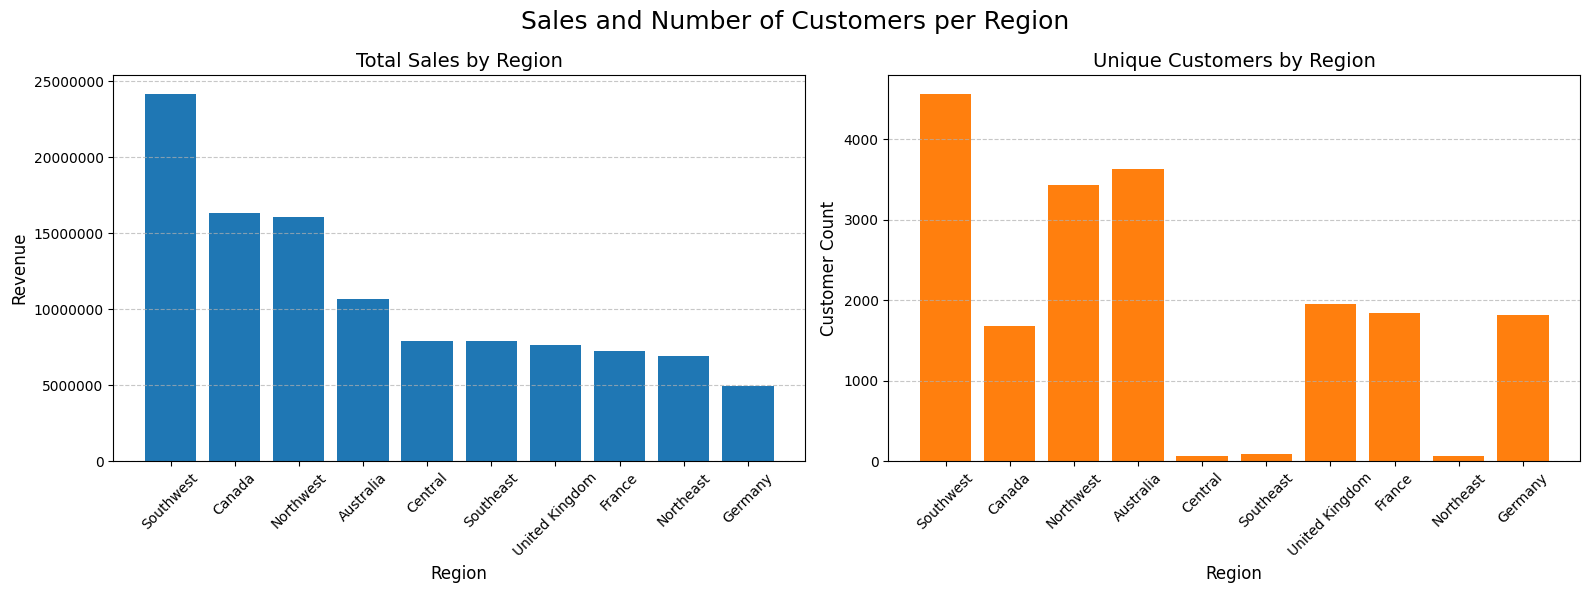

Regional Data:
       RegionName    TotalSales  UniqueCustomers
0       Southwest  2.418461e+07             4565
1          Canada  1.635577e+07             1677
2       Northwest  1.608494e+07             3428
3       Australia  1.065534e+07             3625
4         Central  7.909009e+06               69
5       Southeast  7.879655e+06               91
6  United Kingdom  7.670721e+06             1951
7          France  7.251556e+06             1844
8       Northeast  6.939374e+06               57
9         Germany  4.915408e+06             1812


In [8]:
# --- QUESTION 6: Sales & Customers by Region ---

# 1. READ SQL
with open('../data/query6.sql', 'r') as file:
    query_q6 = file.read()

# 2. GET DATA
df_q6 = pd.read_sql(query_q6, engine)

# 3. VISUALIZE (Subplots for different scales)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- Chart 1: Total Sales ---
ax1.bar(df_q6['RegionName'], df_q6['TotalSales'], color='#1f77b4')
ax1.set_title('Total Sales by Region', fontsize=14)
ax1.set_xlabel('Region', fontsize=12)
ax1.set_ylabel('Revenue', fontsize=12)
ax1.tick_params(axis='x', rotation=45) # Rotate labels for readability
ax1.ticklabel_format(style='plain', axis='y')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# --- Chart 2: Unique Customers ---
ax2.bar(df_q6['RegionName'], df_q6['UniqueCustomers'], color='#ff7f0e')
ax2.set_title('Unique Customers by Region', fontsize=14)
ax2.set_xlabel('Region', fontsize=12)
ax2.set_ylabel('Customer Count', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Sales and Number of Customers per Region', fontsize=18)
plt.tight_layout()
plt.show()

# 4. INSIGHTS
print("Regional Data:")
print(df_q6)

**add analysis for questin 6**


## Average Order Value by Region and Customer Type

Business Question: Which regions have the highest/lowest average order value, and does it differ between individual and corporate customers?

Data Requirements:

- Use tables: Sales.SalesTerritory, Sales.SalesOrderHeader, Sales.Customer, Sales.Store
- Calculate: Total Sales / Number of Orders per Region
- Split by Customer Type: Store (Company) vs. Individual (Private)
- Sort from highest to lowest average

Visualization Requirements:

- Type: Grouped Bar
- Title: "Average Order Value per Region and Customer Type"
- Two bars per region: one for Store, one for Individual
- Sort regions by highest average (total)

Insight Requirements:

- Compare Store vs. Individual - which group has higher order value? Does it differ between regions? What can explain the differences? Which region + customer type combination has the highest order value?

<Figure size 1400x700 with 0 Axes>

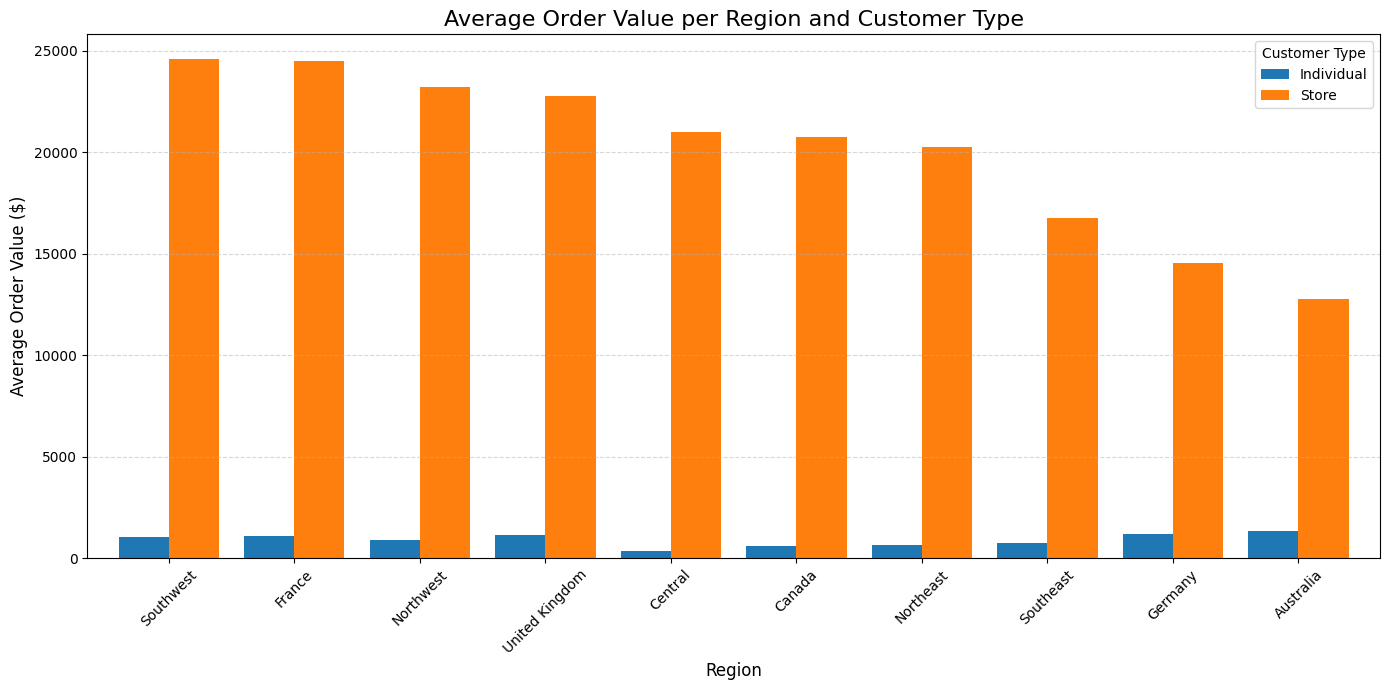

Detailed Data:
CustomerType    Individual       Store
RegionName                            
Southwest        1044.7927  24589.1595
France           1064.4193  24508.1804
Northwest         899.4249  23199.7686
United Kingdom   1119.0076  22760.6852
Central           333.4255  21026.6174
Canada            586.0281  20777.3491
Northeast         653.2468  20271.4678
Southeast         719.9323  16774.8746
Germany          1165.1821  14540.2536
Australia        1348.7646  12754.6830


In [9]:
# --- QUESTION 7: Average Order Value (Store vs Individual) ---

# 1. READ SQL
with open('../data/query7.sql', 'r') as file:
    query_q7 = file.read()

# 2. GET DATA
df_q7 = pd.read_sql(query_q7, engine)

# 3. TRANSFORM (PIVOT)
# We reshape the data so "Individual" and "Store" become their own columns
# This makes plotting a grouped bar chart extremely easy
df_pivot = df_q7.pivot(index='RegionName', columns='CustomerType', values='AvgOrderValue')

# Sort by 'Store' value (usually the highest) so the chart looks organized
df_pivot = df_pivot.sort_values(by='Store', ascending=False)

# 4. VISUALIZE
plt.figure(figsize=(14, 7))

# Pandas makes grouped bar charts very easy with the .plot() function
# kind='bar' creates vertical bars, distinct by the columns we pivoted
df_pivot.plot(kind='bar', figsize=(14, 7), color=['#1f77b4', '#ff7f0e'], width=0.8)

plt.title('Average Order Value per Region and Customer Type', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Order Value ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Customer Type')

# Format Y-axis to avoid scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

# 5. INSIGHTS
print("Detailed Data:")
print(df_pivot)

**add analysis and insights for Q7**


## Alternative B: Product Portfolio Analysis

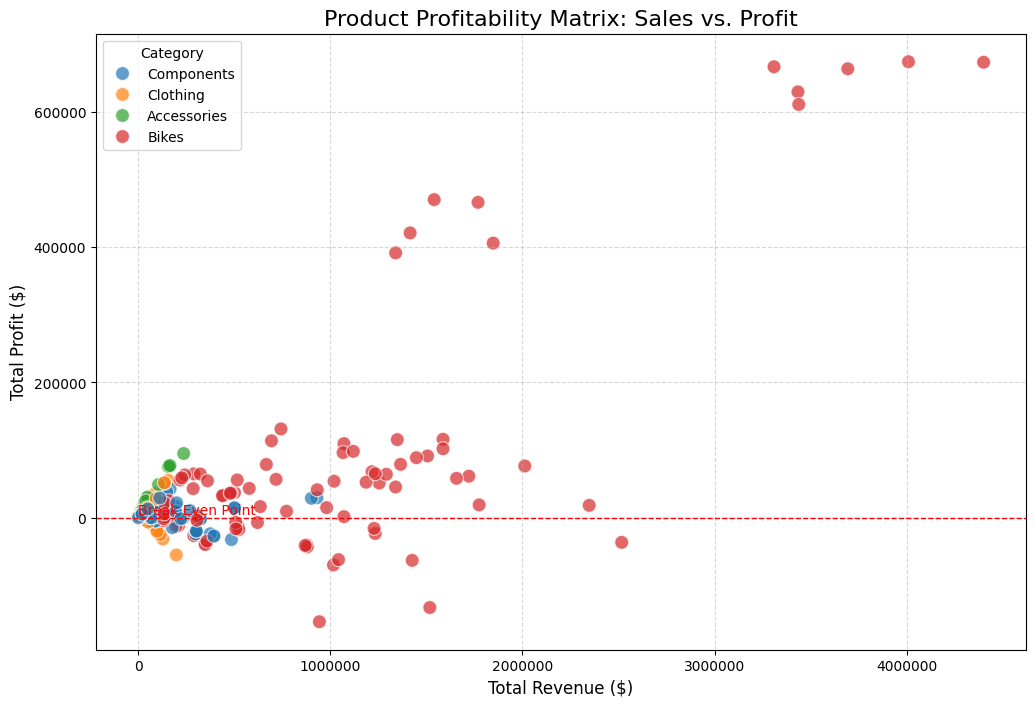

Top 5 Most Profitable Products:
                 ProductName  TotalRevenue    TotalProfit
39    Mountain-200 Black, 42  4.009495e+06  674216.578641
218   Mountain-200 Black, 38  4.400593e+06  673444.470300
70    Mountain-200 Black, 46  3.309673e+06  666740.692608
249  Mountain-200 Silver, 38  3.693678e+06  663784.942272
40   Mountain-200 Silver, 46  3.434257e+06  629644.129928

Bottom 5 Least Profitable (or Money Losing) Products:
                 ProductName  TotalRevenue    TotalProfit
229         Road-650 Red, 44  9.433406e+05 -153696.116612
22   Touring-1000 Yellow, 60  1.518133e+06 -132745.719453
3           Road-650 Red, 60  1.016529e+06  -69800.112786
19   Touring-1000 Yellow, 46  1.426373e+06  -62974.720176
240       Road-650 Black, 52  1.042910e+06  -61914.203970


In [10]:
# --- OPTION B: Product Portfolio Analysis (Scatter Plot) ---

# 1. READ SQL
with open('../data/query_b1.sql', 'r') as file:
    query_b1 = file.read()

# 2. GET DATA
df_b1 = pd.read_sql(query_b1, engine)

# Calculate Margin Percentage for the tooltip/analysis (Optional but useful)
df_b1['MarginPercent'] = (df_b1['TotalProfit'] / df_b1['TotalRevenue']) * 100

# 3. VISUALIZE (Scatter Plot)
import seaborn as sns # We use seaborn because it handles categories (colors) automatically

plt.figure(figsize=(12, 8))

# Draw the scatter plot
# hue='CategoryName' colors the dots by category automatically
sns.scatterplot(
    data=df_b1, 
    x='TotalRevenue', 
    y='TotalProfit', 
    hue='CategoryName', 
    s=100, # Size of dots
    alpha=0.7 # Transparency
)

# Add a "Break Even" line (where Profit = 0)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.text(0, 0, 'Break Even Point', color='red', va='bottom')

plt.title('Product Profitability Matrix: Sales vs. Profit', fontsize=16)
plt.xlabel('Total Revenue ($)', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Fix scientific notation on axes
plt.ticklabel_format(style='plain', axis='both')

plt.legend(title='Category', loc='upper left')
plt.show()

# 4. INSIGHTS (Find the Top Winner and Biggest Loser)
print("Top 5 Most Profitable Products:")
print(df_b1.sort_values(by='TotalProfit', ascending=False)[['ProductName', 'TotalRevenue', 'TotalProfit']].head(5))

print("\nBottom 5 Least Profitable (or Money Losing) Products:")
print(df_b1.sort_values(by='TotalProfit', ascending=True)[['ProductName', 'TotalRevenue', 'TotalProfit']].head(5))

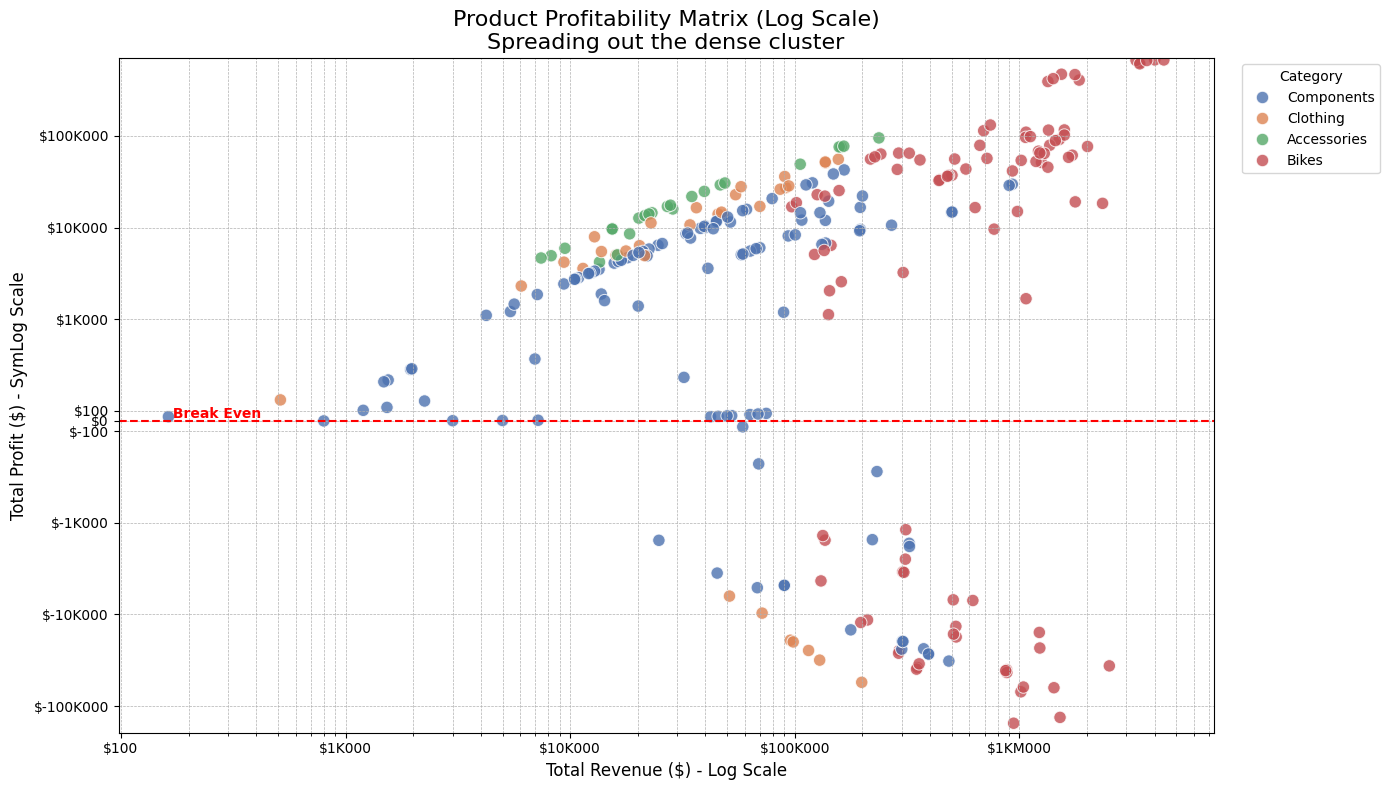

In [11]:
# --- OPTION B: Product Portfolio Analysis (Scatter Plot - Log Scale) ---

# 1. READ SQL (Same as before)
with open('../data/query_b1.sql', 'r') as file:
    query_b1 = file.read()

# 2. GET DATA (Same as before)
df_b1 = pd.read_sql(query_b1, engine)

# 3. VISUALIZE (Scatter Plot with Log Scales)
import seaborn as sns
import matplotlib.ticker as mticker # Needed for nice log-scale labels

plt.figure(figsize=(14, 8))

# Draw the scatter plot
sns.scatterplot(
    data=df_b1,
    x='TotalRevenue',
    y='TotalProfit',
    hue='CategoryName',
    s=80,
    alpha=0.8,
    palette='deep' # A slightly distinct color palette
)

# --- THE KEY CHANGE: Logarithmic Axes ---
plt.xscale('log')
# Use 'symlog' for Y to handle negative profits gracefully
# linthresh defines the region around zero to treat linearly
plt.yscale('symlog', linthresh=1000)

# Add the Break Even line
plt.axhline(0, color='red', linestyle='--', linewidth=1.5)
plt.text(df_b1['TotalRevenue'].min(), 0, ' Break Even', color='red', va='bottom', fontweight='bold')

# Titles and Labels
plt.title('Product Profitability Matrix (Log Scale)\nSpreading out the dense cluster', fontsize=16)
plt.xlabel('Total Revenue ($) - Log Scale', fontsize=12)
plt.ylabel('Total Profit ($) - SymLog Scale', fontsize=12)
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Optional: Format x-axis ticks to look nicer (e.g., $10K, $100K, $1M)
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: '${:,.0f}'.format(y).replace(',', 'K').replace('000K', 'M')))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: '${:,.0f}'.format(y).replace(',', 'K')))

plt.legend(title='Category', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

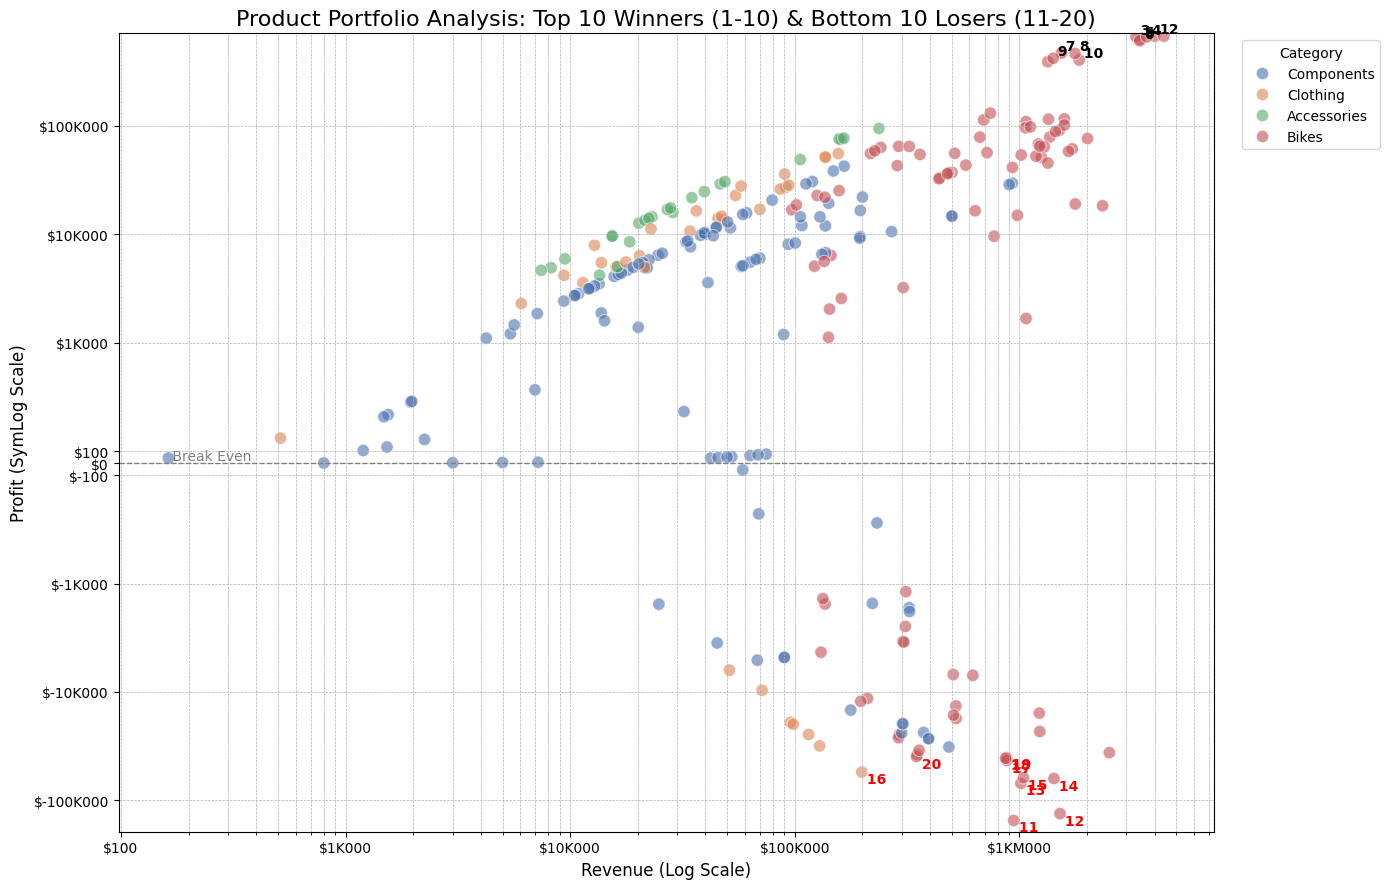


🏆 TOP 10 STARS (Highest Profit)
 MapID             ProductName CategoryName   TotalProfit
     1  Mountain-200 Black, 42        Bikes 674216.578641
     2  Mountain-200 Black, 38        Bikes 673444.470300
     3  Mountain-200 Black, 46        Bikes 666740.692608
     4 Mountain-200 Silver, 38        Bikes 663784.942272
     5 Mountain-200 Silver, 46        Bikes 629644.129928
     6 Mountain-200 Silver, 42        Bikes 611084.897423
     7        Road-150 Red, 48        Bikes 470355.021400
     8        Road-150 Red, 62        Bikes 466320.168000
     9        Road-150 Red, 52        Bikes 421110.868400
    10        Road-150 Red, 56        Bikes 406079.279200

⚠️ BOTTOM 10 RISKS (Lowest Profit)
 MapID                ProductName CategoryName    TotalProfit
    11           Road-650 Red, 44        Bikes -153696.116612
    12    Touring-1000 Yellow, 60        Bikes -132745.719453
    13           Road-650 Red, 60        Bikes  -69800.112786
    14    Touring-1000 Yellow, 46        Bike

In [12]:
# --- OPTION B: Product Portfolio (Top 10 vs Bottom 10) ---

# 1. PREPARE DATA
with open('../data/query_b1.sql', 'r') as file:
    query_b1 = file.read()
df_b1 = pd.read_sql(query_b1, engine)

# Identify Top 10 Winners and Bottom 10 Losers
top_10 = df_b1.nlargest(10, 'TotalProfit').copy()
bottom_10 = df_b1.nsmallest(10, 'TotalProfit').copy()

# Assign them ID numbers for the chart
# Winners: 1 to 10
top_10['MapID'] = range(1, 11)   
# Losers: 11 to 20
bottom_10['MapID'] = range(11, 21) 

# 2. VISUALIZE
import seaborn as sns
import matplotlib.ticker as mticker

plt.figure(figsize=(14, 9))

# A. The Scatter Plot
sns.scatterplot(
    data=df_b1,
    x='TotalRevenue',
    y='TotalProfit',
    hue='CategoryName',
    s=80,
    alpha=0.6,
    palette='deep'
)

# B. Scales & Lines
plt.xscale('log')
plt.yscale('symlog', linthresh=1000)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.text(df_b1['TotalRevenue'].min(), 0, ' Break Even', color='gray', va='bottom')

# C. Add Numbered Labels (Expanded List)
# Label Winners (1-10)
for _, row in top_10.iterrows():
    plt.text(
        row['TotalRevenue'], row['TotalProfit'], 
        f" {int(row['MapID'])}", 
        fontweight='bold', fontsize=10, color='black', va='bottom'
    )

# Label Losers (11-20)
for _, row in bottom_10.iterrows():
    plt.text(
        row['TotalRevenue'], row['TotalProfit'], 
        f" {int(row['MapID'])}", 
        fontweight='bold', fontsize=10, color='red', va='top'
    )

# Formatting
plt.title('Product Portfolio Analysis: Top 10 Winners (1-10) & Bottom 10 Losers (11-20)', fontsize=16)
plt.xlabel('Revenue (Log Scale)', fontsize=12)
plt.ylabel('Profit (SymLog Scale)', fontsize=12)
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Fix Axes
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: '${:,.0f}'.format(y).replace(',', 'K').replace('000K', 'M')))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: '${:,.0f}'.format(y).replace(',', 'K')))

plt.legend(title='Category', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. DISPLAY THE LOOKUP TABLES
print("\n" + "="*50)
print("🏆 TOP 10 STARS (Highest Profit)")
print("="*50)
print(top_10[['MapID', 'ProductName', 'CategoryName', 'TotalProfit']].to_string(index=False))

print("\n" + "="*50)
print("⚠️ BOTTOM 10 RISKS (Lowest Profit)")
print("="*50)
print(bottom_10[['MapID', 'ProductName', 'CategoryName', 'TotalProfit']].to_string(index=False))

Road 650 causes big losses. 

## Step 2: The Deep Dive (Pivot Table)

In [13]:
# --- OPTION B: Subcategory Profitability (FIXED) ---

# 1. RE-READ SQL (Critical step to get the new column)
with open('../data/query_b1.sql', 'r') as file:
    query_b1 = file.read()

# 2. GET DATA (Now includes 'ProductSubcategoryName')
df_b1 = pd.read_sql(query_b1, engine)

# 3. PREPARE GROUPED DATA
df_sub = df_b1.groupby(['CategoryName', 'ProductSubcategoryName'])[['TotalProfit', 'TotalRevenue']].sum().reset_index()

# Calculate Margin %
df_sub['Margin %'] = (df_sub['TotalProfit'] / df_sub['TotalRevenue']) * 100

# 4. PIVOT & STYLE
pivot_table = df_sub.sort_values(by='TotalProfit', ascending=False)

# Display as a Heatmap
styled_table = pivot_table.style.format({
    'TotalProfit': '${:,.0f}',
    'TotalRevenue': '${:,.0f}',
    'Margin %': '{:.1f}%'
}).background_gradient(subset=['TotalProfit'], cmap='RdYlGn')

print("Profitability by Subcategory (Green = Profit, Red = Loss):")
styled_table

Profitability by Subcategory (Green = Profit, Red = Loss):


,CategoryName,ProductSubcategoryName,TotalProfit,TotalRevenue,Margin %
10,Bikes,Mountain Bikes,"$4,908,042","$36,445,444",13.5%
11,Bikes,Road Bikes,"$2,811,074","$43,909,438",6.4%
29,Components,Mountain Frames,"$261,605","$4,713,930",5.5%
5,Accessories,Helmets,"$228,329","$484,049",47.2%
12,Bikes,Touring Bikes,"$217,278","$14,296,291",1.5%
34,Components,Wheels,"$176,045","$680,831",25.9%
17,Clothing,Shorts,"$155,974","$413,601",37.7%
9,Accessories,Tires and Tubes,"$154,049","$246,455",62.5%
20,Clothing,Vests,"$99,468","$259,488",38.3%
0,Accessories,Bike Racks,"$95,006","$237,096",40.1%


## Step 3: The Final Visual (Grouped Bar Chart)

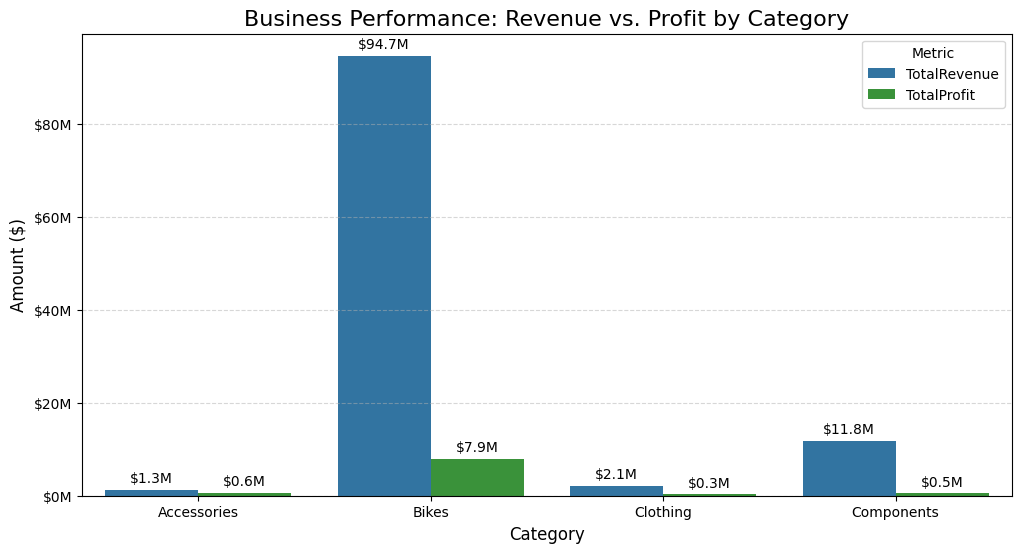

Efficiency Check (Profit Margin):
CategoryName  Margin %
 Accessories 50.028129
    Clothing 14.566186
       Bikes  8.384887
  Components  4.153606


In [14]:
# --- OPTION B: Final Visual (Grouped Bar Chart: Sales vs Profit) ---

# 1. PREPARE DATA
# Group by main Category to get the high-level view
df_cat = df_b1.groupby('CategoryName')[['TotalRevenue', 'TotalProfit']].sum().reset_index()

# Melt the data (Reshape) so we can plot "Revenue" and "Profit" side-by-side easily
df_melted = df_cat.melt(id_vars='CategoryName', var_name='Metric', value_name='Amount')

# 2. VISUALIZE
plt.figure(figsize=(12, 6))

# Create Grouped Bar Chart
ax = sns.barplot(
    data=df_melted,
    x='CategoryName',
    y='Amount',
    hue='Metric',
    palette=['#1f77b4', '#2ca02c'] # Blue for Revenue, Green for Profit
)

# 3. FORMATTING
plt.title('Business Performance: Revenue vs. Profit by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Fix Y-axis to show "Millions" (M)
import matplotlib.ticker as mticker
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: '${:,.0f}M'.format(y/1_000_000)))

# Add Data Labels (Optional but Professional)
for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f'${x/1_000_000:.1f}M', padding=3)

plt.legend(title='Metric')
plt.show()

# 4. INSIGHTS (Efficiency Check)
# Calculate Profit Margin %
df_cat['Margin %'] = (df_cat['TotalProfit'] / df_cat['TotalRevenue']) * 100
print("Efficiency Check (Profit Margin):")
print(df_cat[['CategoryName', 'Margin %']].sort_values(by='Margin %', ascending=False).to_string(index=False))